In [57]:
def algoRandomForest(df,ls):
# 1. Remove NULL value from the Dataset.
    df=df.dropna()
# 2. Remove redundent column from the Dataset Which will decrease the value of dataset.
    for i in ls:
        if i=="Name":
            df=df.drop(i,axis=1)
            ls.remove(i)
        if i=="Address":
            df=df.drop(i,axis=1)
        if i=="Mobile_No":
            df=df.drop(i,axis=1)
# 3. Set Target value.
    y=df.iloc[:,-1].values
    
# 4. Set Input value.
    X=df.iloc[:,:-1]   
    
# 5. (optional) If we want to use sklearn LabelEncoder and OneHotEncoder.
#     for i in ls:
#         if i=="Sex" or i=="Gender":
#             labelencoder_X = LabelEncoder()
#             X[:,list(df.columns.values).index(i)] = labelencoder_X.fit_transform(X[:, list(df.columns.values).index(i)])
#         else:
#             ct = ColumnTransformer([(i, OneHotEncoder(), [list(df.columns.values).index(i)])], remainder = 'passthrough')
#             X = ct.fit_transform(X)

# 6. If the given list of feature object is not null then it will do Encoding using pandas.
    if(len(ls)>0):
        X = pd.get_dummies(X, columns = ls)
        
# 7. LabelEncoder for Target value.
    labelencoder_y=LabelEncoder()
    y = labelencoder_y.fit_transform(y)
    
    X=X.values
    print("shape: ",X.shape)
    
# 8. Split the Dataset into Train and Test.
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    
# 9. Scaling the values of Input data.
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X_train)
    X_test=sc_X.fit_transform(X_test)
    
# 10. RandomForest model initilization.
    model = RandomForestClassifier(n_estimators=600)
    
# 11. Fit the train and test vlaues into dataset.  
    model.fit(X_train, y_train)
    
# 12. save the model to disk
    filename = 'finalized_model.sav'
    pickle.dump(model, open(filename, 'wb'))
    
# 13.load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))
    
# 14. Predict the the output.
    model_pred = loaded_model.predict(X_test)
    
# 15. For result analysis we use confusion matrix.
    cm=confusion_matrix(model_pred,y_test)
    
# 16. Print the heatmap of confusion matrix.
    print(sns.heatmap(cm,annot=True))
    print(confusion_matrix(y_test,model_pred))
    
# 17. Print the classification report.
    print(classification_report(y_test,model_pred))
    
# 18. print the Accuracy of model
    result = loaded_model.score(X_test, y_test)
    print("Accuracy: ",result)

In [58]:
# Import all the useful libraries.
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix


shape:  (331, 11)
AxesSubplot(0.125,0.125;0.62x0.755)
[[39  0]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        28

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Accuracy:  1.0


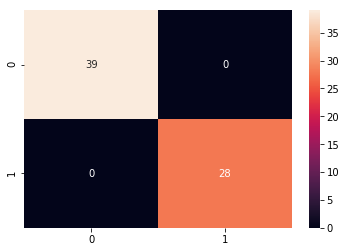

In [60]:
# input the dataset from user.
data=pd.read_csv('./input/titnic_prob.csv')
# just pass the dataset and object parameter as list in given function.
# if any objects in dataset i.e.: ["Gender","Place"]
# for titanic dataset
algoRandomForest(data,["Name","Sex","Embarked"])
# for heart dataset
# algoRandomForest(data,[""])  
